In [510]:
import pandas as pd
from matplotlib import pyplot as plt 
import numpy

In [511]:
from astropy.timeseries import LombScargle
from gatspy.periodic import LombScargleFast
from gatspy.periodic import LombScargle
from matplotlib.backends.backend_pdf import PdfFile, PdfPages

In [512]:
from statistics import mean
from turtle import filling
num=list()
def read(path,c):
    df = pd.read_csv(path)
    global pdfFile
    if c <10:
        pdfFile = PdfPages(f"data/power_spectrum/00{c}(PSD).pdf")
    else: 
        pdfFile = PdfPages(f"data/power_spectrum/0{c}(PSD).pdf")
    global wu_pulmer_score
    wu_pulmer_score = list(df["Wu-Pulmer"])
    global SBERT
    SBERT = list(df["SBERT"])
    global Wu_Pulmer_Divided 
    Wu_Pulmer_Divided = list(df["Wu-Pulmer_divided"])
    global pair_counts
    pair_counts = list(df["pair_counts"])
    q=0
    global num
    num=[]
    while q <len(df):
        num += [q]
        q+=1


In [513]:
import numpy as np
from astropy.timeseries import LombScargle
import matplotlib.transforms as transforms
from matplotlib.offsetbox import AnchoredText
from scipy.signal import argrelextrema

In [514]:
a = np.array([2,3,1,4,3,5,2])
a = np.append(a,[2,3])
print(a[-2])

2


設定想要找幾個極值

In [515]:
num_of_extremum = 3 #設定想要找幾個極值

畫圖的函式

In [516]:
from ctypes.wintypes import SIZE


def calculate_PSD(x):

    frequency, power = LombScargle(num,wu_pulmer_score).autopower(minimum_frequency=0.01,maximum_frequency=0.1)
    fig = plt.figure(figsize = (20,6))
    #fig, ax=plt.subplots(figsize = (20,6))
    plt.title(f"subject:{x}     raw_wu_pulmer_score_PSD ")
    plt.grid()
    plt.xlabel("frequency")
    plt.plot(frequency, power)   
    power_new = np.sort(power)
    extremum = np.sort(power[argrelextrema(power,np.greater)])
    pmaxf = np.array([])
    for i in range(1, (num_of_extremum+1)):
        pmaxf = np.append(pmaxf,frequency[numpy.where(power == extremum[-i])])
        #plt.axhline(y=extremum[-i], linestyle = "dashed", xmin=0.01, xmax=20,color = "red") #這條是y水平線，想要可以加
        plt.axvline(x = pmaxf[-1], linestyle = "dashed", ymin=0, ymax = 25 ,color = "red") #因為pmaxf一直在新增，所以輪到那圈時的pmax[-1]就會是那圈新增的第i大的power的f
    #trans = transforms.blended_transform_factory( ax.get_yticklabels()[0].get_transform(), ax.transData)
    #plt.text(0,23, "{:.0f}".format(max(power)), color="red", transform=trans, ha="right", va="center")
    #plt.scatter(argrelextrema(power,np.greater), power[argrelextrema(power,np.greater)],c='red') #找極值用的
    plt.annotate(f'f={pmaxf[:]}\npmax={extremum[:-num_of_extremum-1:-1]}', xy=(0.4, 0.7), xycoords='axes fraction') 
    pdfFile.savefig(fig)



    frequency, power = LombScargle(num,SBERT).autopower(minimum_frequency=0.01,maximum_frequency=0.1)
    fig = plt.figure(figsize = (20,6))
    plt.title(f"subject:{x}     SBERT_PSD ")
    plt.grid()
    plt.show
    plt.xlabel("frequency")
    plt.plot(frequency, power)    
    power_new = np.sort(power)
    extremum = np.sort(power[argrelextrema(power,np.greater)])
    pmaxf = np.array([])
    for i in range(1, (num_of_extremum+1)):
        pmaxf = np.append(pmaxf,frequency[numpy.where(power == extremum[-i])])
        #plt.axhline(y=extremum[-i], linestyle = "dashed", xmin=0.01, xmax=20,color = "red") #這條是y水平線，想要可以加
        plt.axvline(x = pmaxf[-1], linestyle = "dashed", ymin=0, ymax = 25 ,color = "red") #因為pmaxf一直在新增，所以輪到那圈時的pmax[-1]就會是那圈新增的第i大的power的f
    plt.annotate(f'f={pmaxf[:]}\npmax={extremum[:-num_of_extremum-1:-1]}', xy=(0.4, 0.7), xycoords='axes fraction') 
    pdfFile.savefig(fig)


    frequency, power = LombScargle(num,Wu_Pulmer_Divided).autopower(minimum_frequency=0.01,maximum_frequency=0.1)
    fig = plt.figure(figsize = (20,6))
    plt.title(f"subject:{x}     SBERT_PSD ")
    plt.grid()
    plt.show
    plt.xlabel("frequency")
    plt.plot(frequency, power)    
    power_new = np.sort(power)
    extremum = np.sort(power[argrelextrema(power,np.greater)])
    pmaxf = np.array([])
    for i in range(1, (num_of_extremum+1)):
        pmaxf = np.append(pmaxf,frequency[numpy.where(power == extremum[-i])])
        #plt.axhline(y=extremum[-i], linestyle = "dashed", xmin=0.01, xmax=20,color = "red") #這條是y水平線，想要可以加
        plt.axvline(x = pmaxf[-1], linestyle = "dashed", ymin=0, ymax = 25 ,color = "red") #因為pmaxf一直在新增，所以輪到那圈時的pmax[-1]就會是那圈新增的第i大的power的f
    plt.annotate(f'f={pmaxf[:]}\npmax={extremum[:-num_of_extremum-1:-1]}', xy=(0.4, 0.7), xycoords='axes fraction') 
    pdfFile.savefig(fig)
        



In [517]:
'''
read(f"data/Text/019(results).csv",19)
good = pd.read_csv("data/Text/019(done).csv")
print(good.describe())
calculate_PSD(19)
pdfFile.close()
'''

'\nread(f"data/Text/019(results).csv",19)\ngood = pd.read_csv("data/Text/019(done).csv")\nprint(good.describe())\ncalculate_PSD(19)\npdfFile.close()\n'

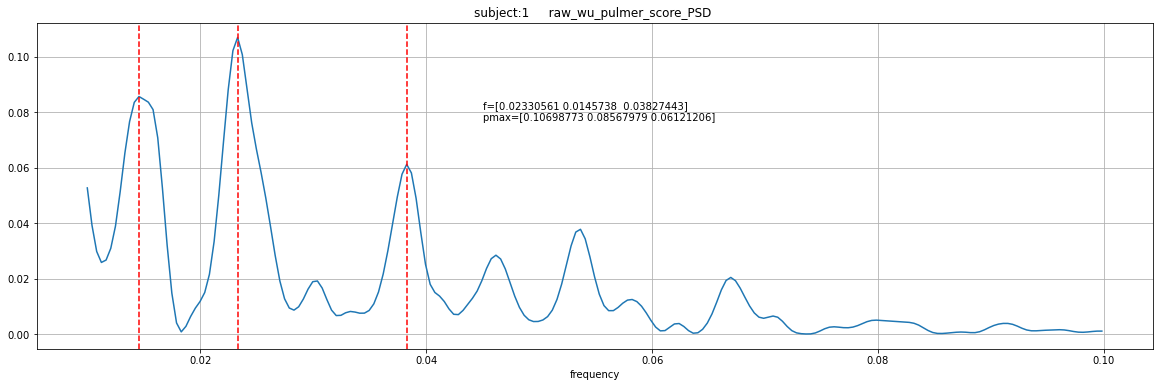

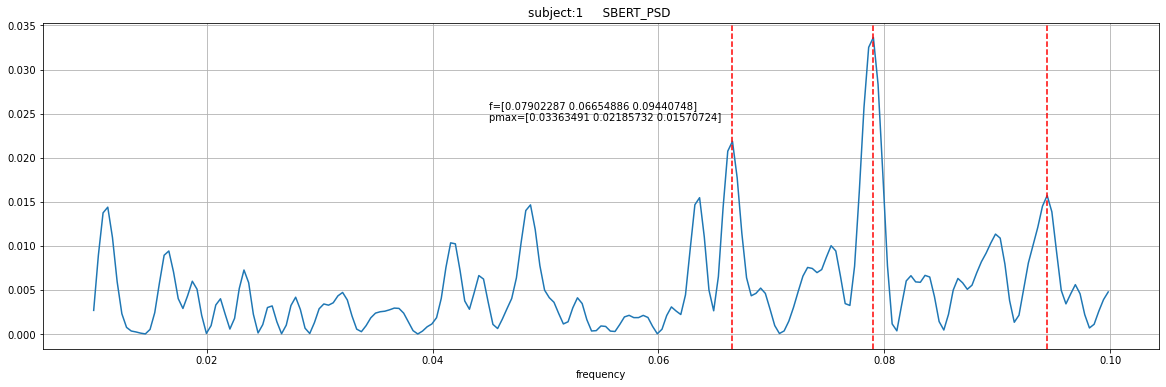

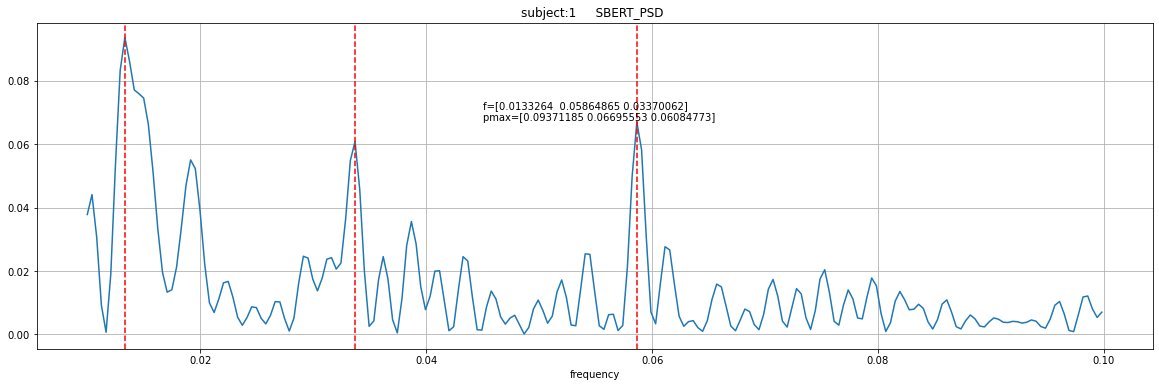

In [518]:
x =1
read(f"data/Text/00{x}(results).csv",x)
calculate_PSD(x)
pdfFile.close()

In [519]:
print(pmaxf[-1])

NameError: name 'pmaxf' is not defined

error: 0
1
0.10698773327593863
[0.02330561]
[0.02330561]
0.02330561330561331
2
0.08567979021985068
[0.0145738]
[0.02330561 0.0145738 ]
0.02330561330561331
3
0.06121206040420753
[0.03827443]
[0.02330561 0.0145738  0.03827443]
0.02330561330561331


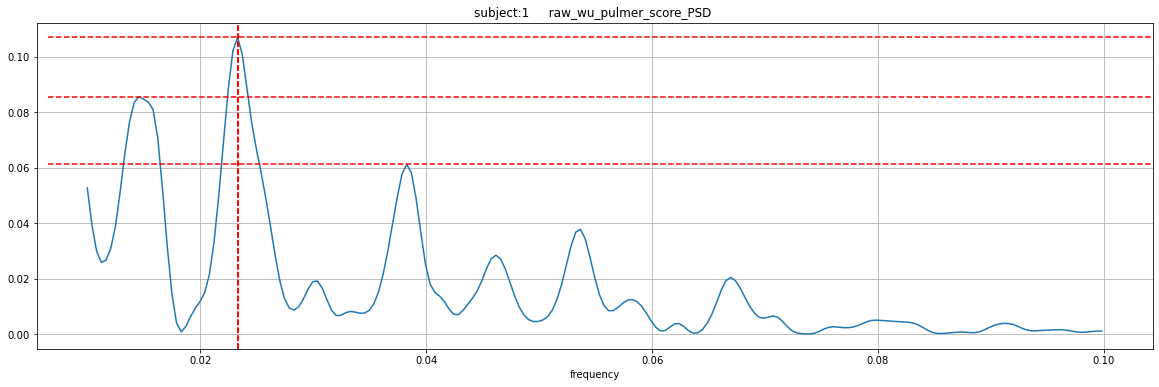

In [ ]:
for x in range (0,2):
    if x < 10:
        try:
            read(f"data/Text/00{x}(results).csv",x)
            calculate_PSD(x)
            pdfFile.close()
        except:
            print("error:", x)
            continue
       
    else:
        try:
            read(f"data/Text/0{x}(results).csv",x)
            calculate_PSD(x)
            pdfFile.close()
        except:
            print("error:", x)
            continue

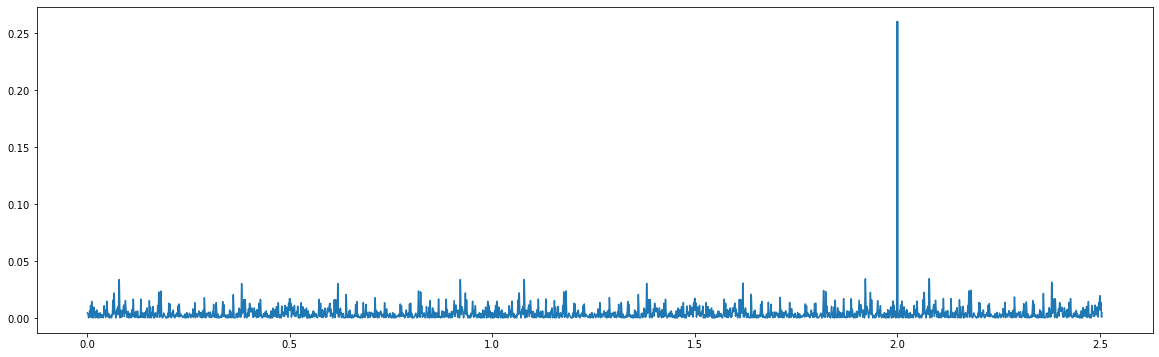

In [ ]:
from astropy.timeseries import LombScargle
frequency, power = LombScargle(num,SBERT).autopower()
fig = plt.figure(figsize = (20,6))
plt.plot(frequency, power)       

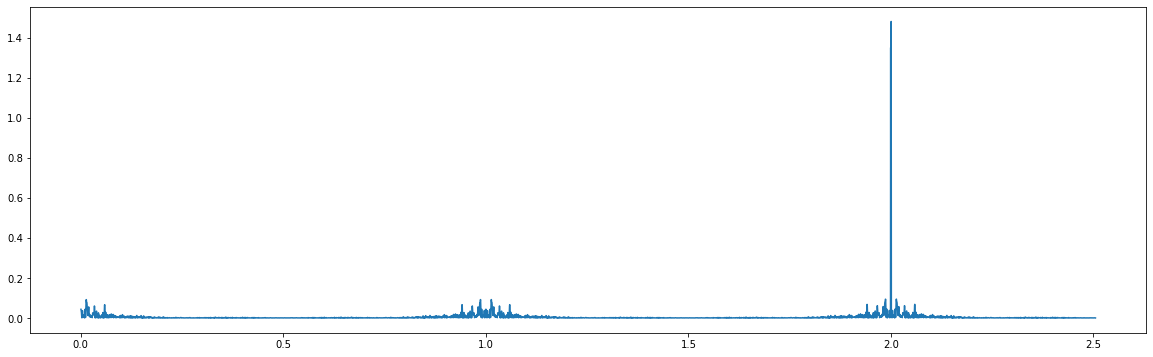

In [ ]:
from astropy.timeseries import LombScargle
frequency, power = LombScargle(num,Wu_Pulmer_Divided).autopower()
fig = plt.figure(figsize = (20,6))
plt.plot(frequency, power)       